In [20]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Homeless-dataset/datadesk-homeless-sleeping-restrictions/'

In [9]:
homeless_count_df = pd.read_excel(path+"homelesscount/homeless-count-2019-results-by-census-tract.xlsx",
                                  sheet_name = 'Counts_by_Tract',
                                  dtype = {"tract":str})
homeless_count_df = homeless_count_df[['tract','totUnsheltPeople']]
homeless_count_df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,tract,totUnsheltPeople
0,101110,12.614
1,101122,1.000
2,101210,14.517
3,101220,24.058
4,101300,9.278


In [10]:
tract_df = pd.read_csv(path+"neighborhoods/tract-neighborhood-allocation.csv",dtype = {"tract":str})
tract_df["tract"] = tract_df["tract"].str.slice(start=-6)

tract_df.head()

,tract,name,tract_percent
0,101110,Tujunga,1.000000
1,101122,Sunland,0.003235
2,101122,Tujunga,0.996765
3,101210,Tujunga,1.000000
4,101220,Tujunga,1.000000


In [15]:
merged = pd.merge(homeless_count_df,tract_df)
merged.head()

,tract,totUnsheltPeople,name,tract_percent
0,101110,12.614,Tujunga,1.000000
1,101122,1.000,Sunland,0.003235
2,101122,1.000,Tujunga,0.996765
3,101210,14.517,Tujunga,1.000000
4,101220,24.058,Tujunga,1.000000


In [17]:
merged['totUnsheltPeoplePortion'] = merged['totUnsheltPeople'] * merged['tract_percent']
merged.head()

,tract,totUnsheltPeople,name,tract_percent,totUnsheltPeoplePortion
0,101110,12.614,Tujunga,1.000000,12.614000
1,101122,1.000,Sunland,0.003235,0.003235
2,101122,1.000,Tujunga,0.996765,0.996765
3,101210,14.517,Tujunga,1.000000,14.517000
4,101220,24.058,Tujunga,1.000000,24.058000


In [28]:
totalsbyhood = merged.groupby('name')\
[['totUnsheltPeoplePortion']]\
.sum()\
.reset_index()\
.sort_values('totUnsheltPeoplePortion', ascending=False)
totalsbyhood = totalsbyhood.head(20)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

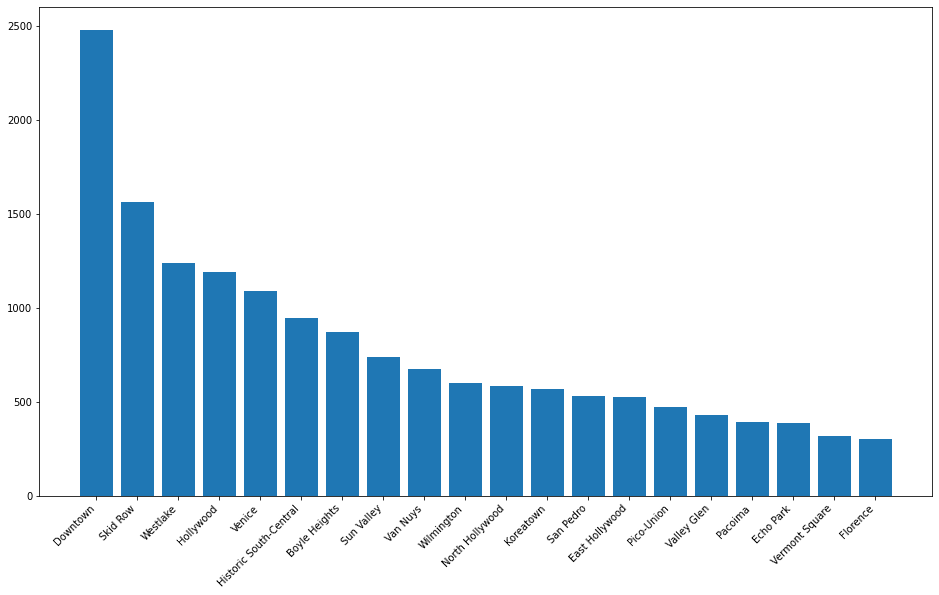

In [29]:
plt.figure(figsize=(16,9))
plt.bar(totalsbyhood['name'], totalsbyhood['totUnsheltPeoplePortion'])
plt.xticks(rotation=45, ha="right")